In [160]:
# Supressing the  Warnings

import warnings
warnings.filterwarnings('ignore')

# Lets import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as stat_model
from sklearn.metrics import r2_score

In [161]:
#Read the data from csv file

data_frame = pd.read_csv('day.csv')

data_frame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [162]:
# check the shape of dataframe

data_frame.shape

(730, 16)

In [163]:
# describe the columns of dataframe

data_frame.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [164]:
#check the information about columns

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [165]:
# check the sum of null values in column data

data_frame.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [166]:
# rename few columns for better readibility

data_frame.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
data_frame.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [167]:
# drop the unwanted columns
# instant has only index for the row,
# casual and registered is subset of cnt column.
# dteday has date which can be obtained by year and month column,
data_frame.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [168]:
# Encode the season column

data_frame.season = data_frame.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [169]:
# Encode the month column

data_frame.month = data_frame.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [170]:
# Encode the weekday column

data_frame.weekday = data_frame.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [171]:
# Encode the weathersit column

data_frame.weathersit = data_frame.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
data_frame.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Visualising the Data

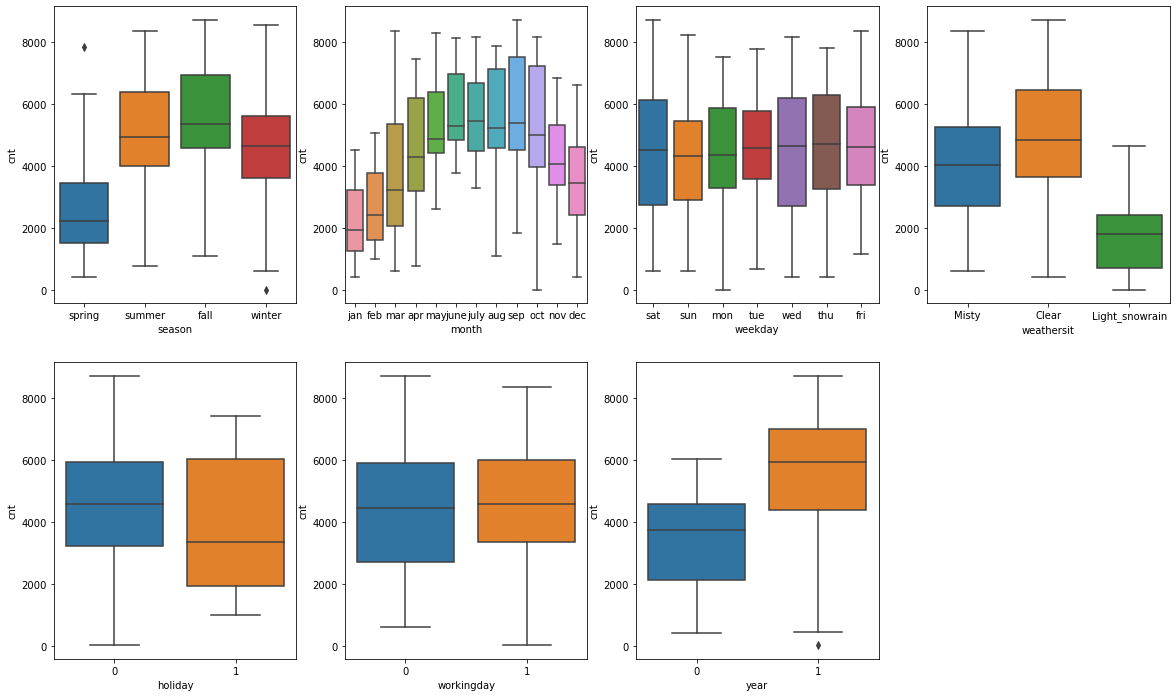

In [173]:
# visualize the categorical date
# to observe how the predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data_frame)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = data_frame)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data_frame)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data_frame)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data_frame)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data_frame)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = data_frame)
plt.show()

In [174]:
# function to create a barplot relating to the categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=data_frame)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=data_frame, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

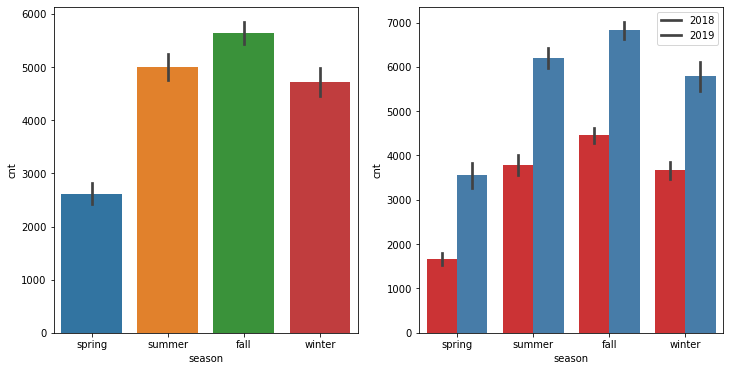

In [154]:
# plot visualization for season column

plot_cat_columns('season')

In the each season the booking count has increased drastically from 2018 to 2019.
Fall season seems to have attracted more booking than other season

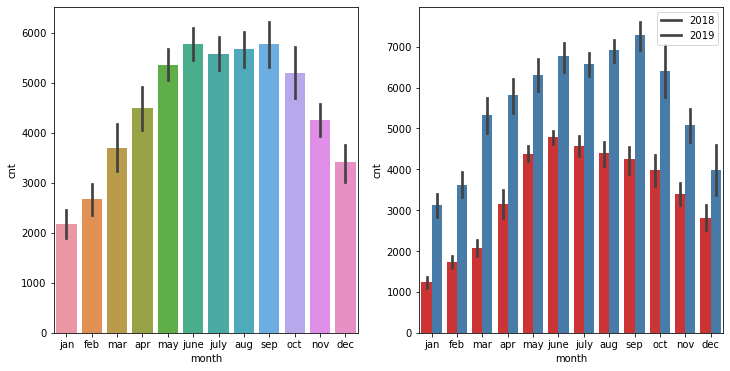

In [155]:
# lets plot visualization for month column

plot_cat_columns('month')

Its observed that the most of the bookings has been done during the month of may, june, july, aug, sep and oct.
Trend seems to increase starting of the year till mid of the year, then it started decreasing as approached the end of year.
Number of booking for each month seems to have increased from 2018 to 2019.

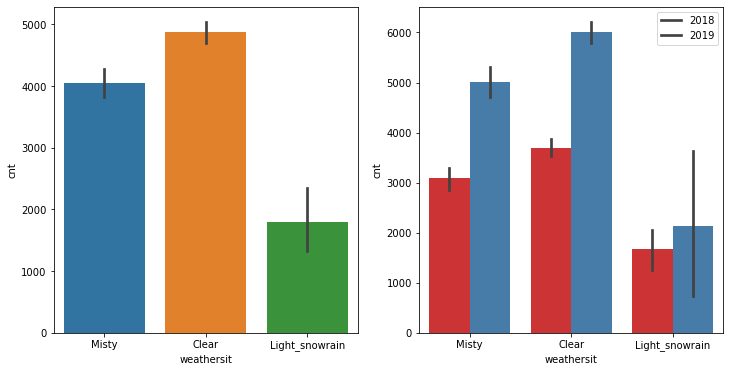

In [175]:
# lets plot visualization for weathersit column

plot_cat_columns('weathersit')

In [ ]:
# lets plot visualization for mo column

plot_cat_columns('weathersit')


comparing to previous year, i.e 2018, booking increased for each weather situation in 2019.
Clear weather attracted more booking which seems obvious.


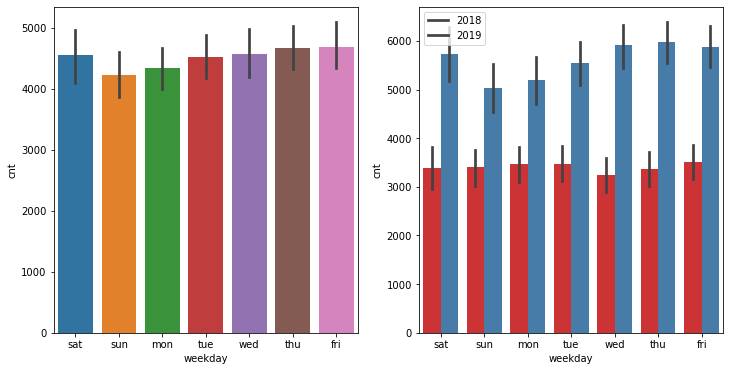

In [176]:
# lets plot visualization for weekday column

plot_cat_columns('weekday')

following days i.e. Thursday, Friday, Saturday and Sunday has more number of bookings as compared to the start of the week.

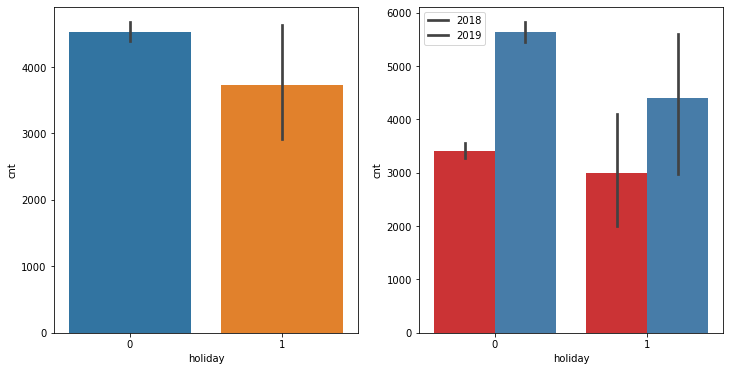

In [177]:
# lets plot visualization for holiday column

plot_cat_columns('holiday')

In [ ]:
When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

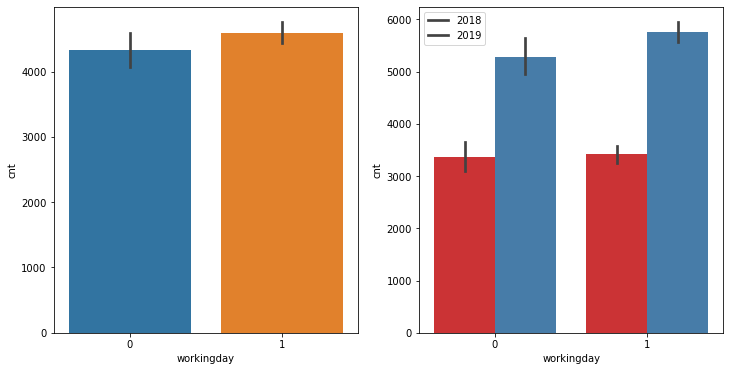

In [178]:

e

In [ ]:
Bookings is same for both working day or non-working day. But,the count increased from 2018 to 2019.

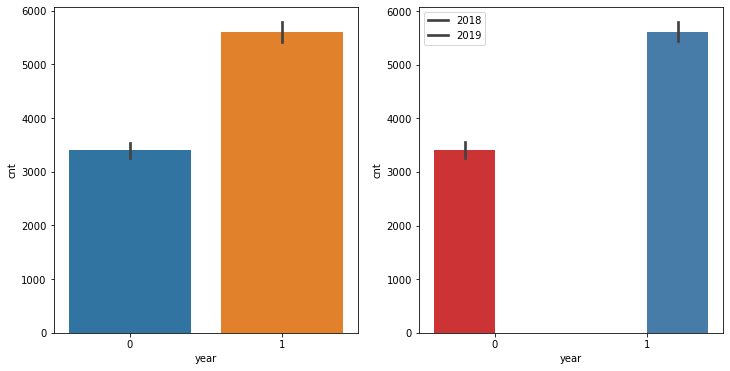

In [179]:
# lets plot visualization for year column

plot_cat_columns('year')

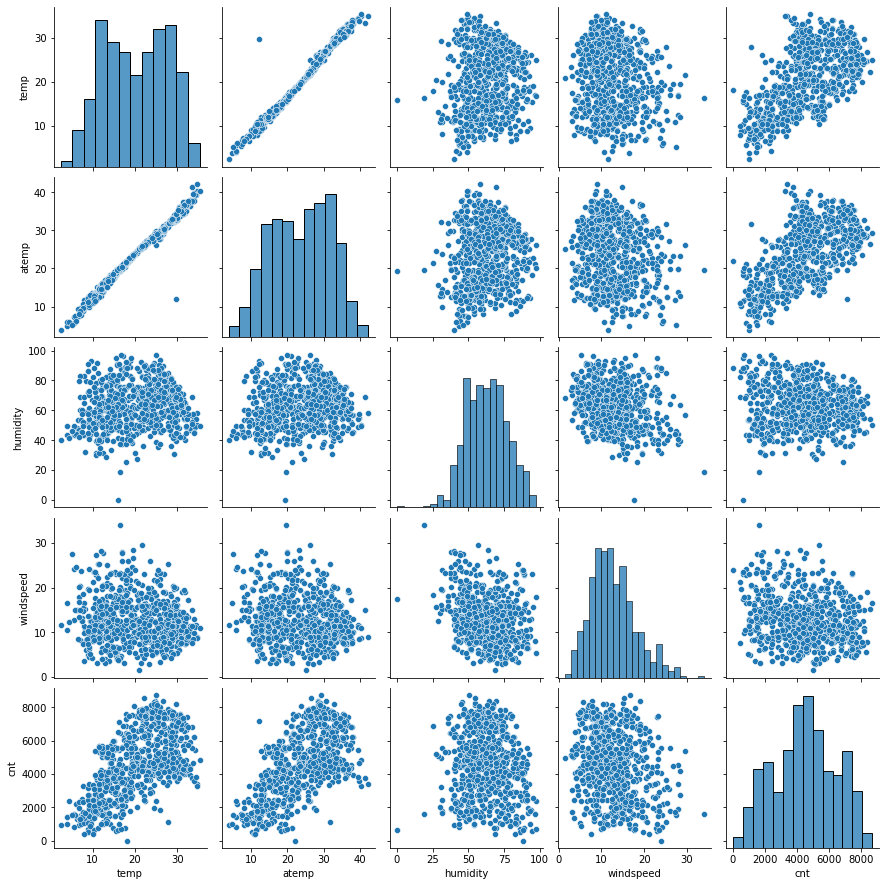

In [180]:
# visualize the numerical columns

sns.pairplot(data=data_frame,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

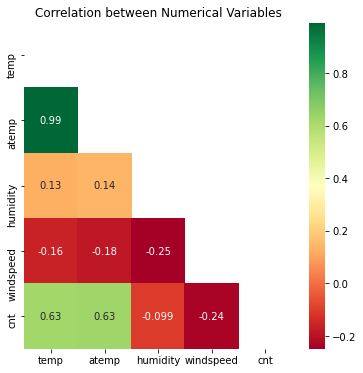

In [181]:
# Lets check the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(data_frame[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(data_frame[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

Its observed that thier is linear relationship between temp and atemp. 
Both of the parameters cannot be used in the model due to multicolinearity.
Lets decide which parameters to keep based on VIF and p-value w.r.t other variables.

# Step 3: Data Preparation

In [183]:
# Lets create dummy variable for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(data_frame.month,drop_first=True)
weekdays_df=pd.get_dummies(data_frame.weekday,drop_first=True)
weathersit_df=pd.get_dummies(data_frame.weathersit,drop_first=True)
seasons_df=pd.get_dummies(data_frame.season,drop_first=True)

# Merging the dataframe, with the dummy variable dataset. 

data_frame_new = pd.concat([data_frame,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

data_frame_new.head()
data_frame_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [184]:
# dropping unnecessary columns as we have already created dummy variable out of it.

data_frame_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

data_frame_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

# Step 4: Splitting the Data into Training and Testing Sets

In [185]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(data_frame_new, train_size = 0.7, random_state = 100)

In [186]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [187]:

# check the shape of testing datatset

df_test.shape

(220, 30)

In [188]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [189]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [190]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


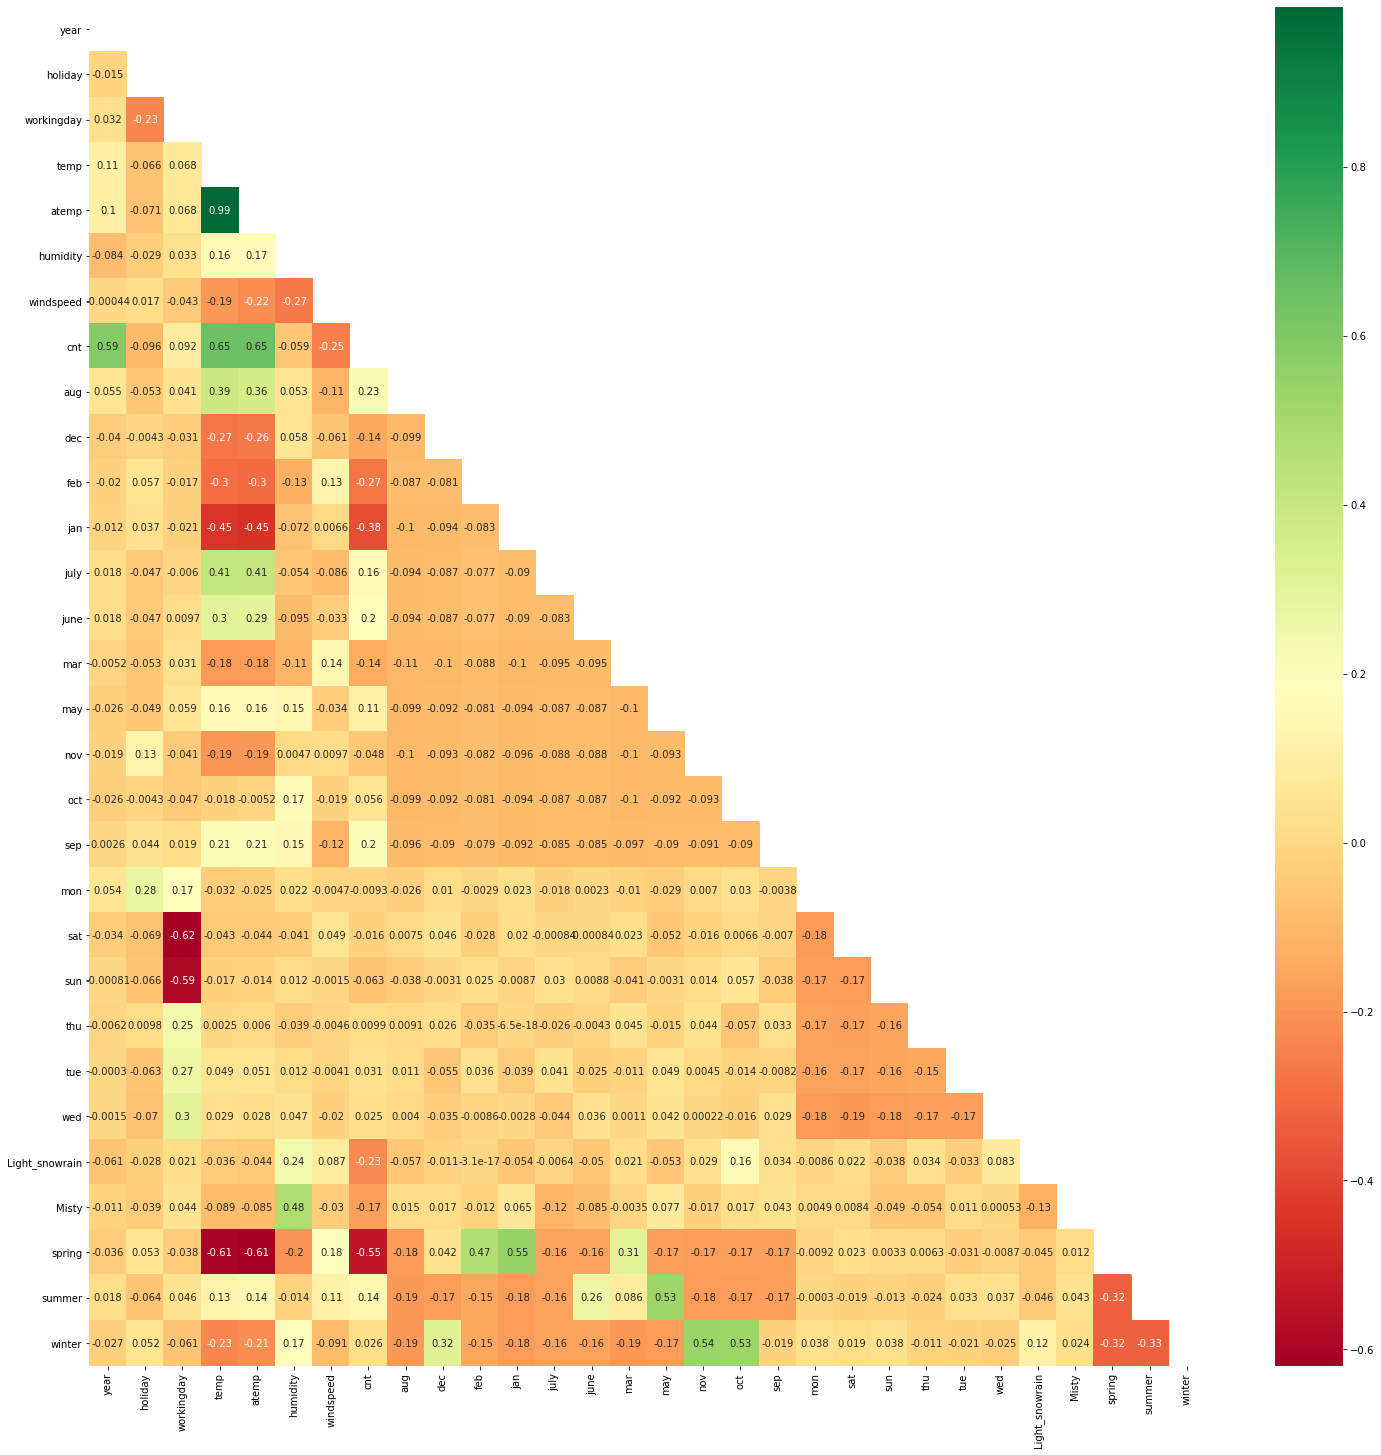

In [191]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

 cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.


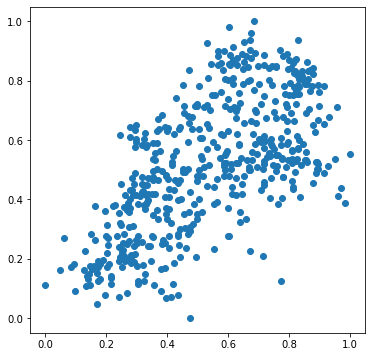

In [192]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [193]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [194]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [195]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 10),
 ('mar', False, 11),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 15),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 14),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [196]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')


In [197]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [198]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [199]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [200]:
# calculate VIF

calculateVIF(X_train_rfe)


,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,humidity,1.91
11,Misty,1.57


In [202]:
# Building 1st linear regression model

X_train_lm_1 = stat_model.add_constant(X_train_rfe)
lr_1 = stat_model.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.11e-191
Time:                        09:16:08   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

In [203]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,workingday,35.88
7,sat,8.96
8,sun,8.41
11,spring,4.96
3,temp,3.39
13,winter,3.35
12,summer,2.60
1,holiday,2.34
5,july,1.48
6,sep,1.29


In [204]:
# Building 2nd linear regression model

X_train_lm_2 = stat_model.add_constant(X_train_new)
lr_2 = stat_model.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.28e-188
Time:                        09:17:05   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1355      0.024      5.

In [205]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

In [206]:
# Building 3rd linear regression model

X_train_lm_3 = stat_model.add_constant(X_train_new)
lr_3 = stat_model.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.28e-188
Time:                        09:17:47   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1008      0.038      2.

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
6,sat,4.45
7,sun,4.21
10,spring,3.82
12,winter,2.78
11,summer,2.76
0,year,2.07
4,july,1.60


In [207]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Building 4th linear regression model

X_train_lm_4 = stat_model.add_constant(X_train_new)
lr_4 = stat_model.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.06e-186
Time:                        09:18:38   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2003      0.030      6.

,Features,VIF
1,temp,5.18
2,windspeed,4.62
10,summer,2.24
9,spring,2.11
0,year,2.07
11,winter,1.82
3,july,1.59
8,Misty,1.55
4,sep,1.33
5,sat,1.22


In [208]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Building 4th linear regression model

X_train_lm_5 = stat_model.add_constant(X_train_new)
lr_5 = stat_model.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.37e-187
Time:                        09:19:07   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2034      0.030      6.

,Features,VIF
1,temp,5.14
2,windspeed,4.60
9,summer,2.23
8,spring,2.09
0,year,2.07
10,winter,1.80
3,july,1.59
7,Misty,1.55
4,sep,1.33
5,sun,1.17


We can cosider the above model i.e lr_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 230.0 (which is greater than 1) and the p-value of  3.37e-187 i.e almost equals to zero, states that the overall model is significant


# Step 6: Residual Analysis of the train data and validation

Text(0.5, 0, 'Errors')

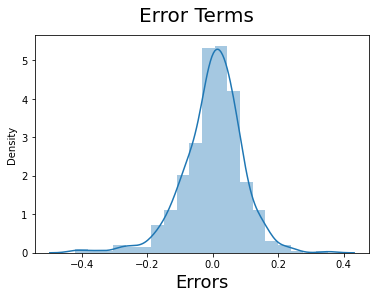

In [209]:
X_train_lm_5

y_train_pred = lr_5.predict(X_train_lm_5)

## Normality of error terms

# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

 Error terms are following normal distribution

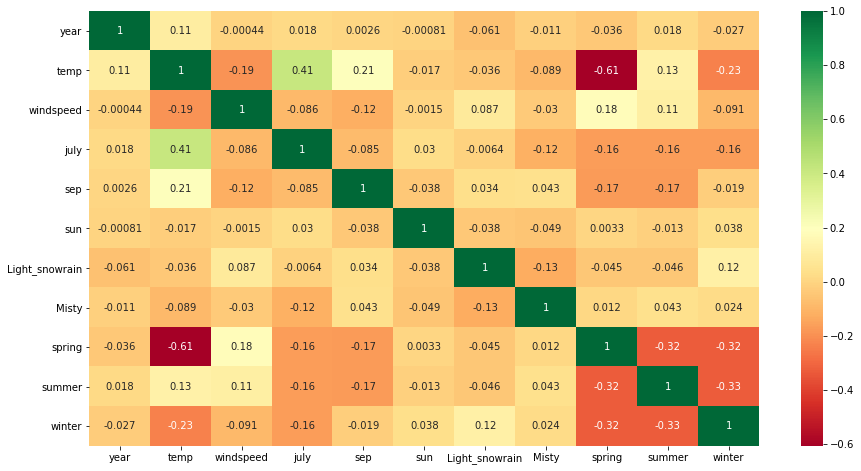

In [210]:
## Multi Colinearity
calculateVIF(X_train_new)

plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

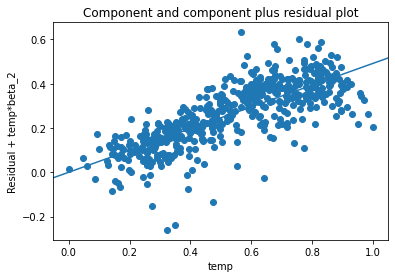

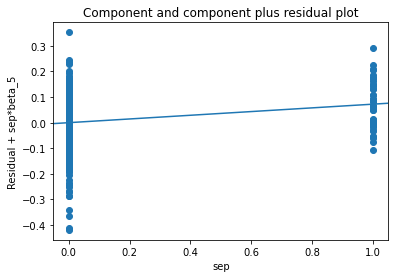

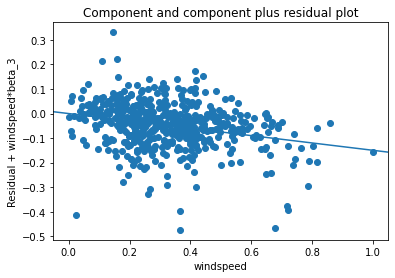

In [212]:
# Linearity

# Linear relationship validation using CCPR plot
# Component and component plus residual plot

stat_model.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

stat_model.graphics.plot_ccpr(lr_5, 'sep')
plt.show()

stat_model.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

 Linearity can be observed from above visualizations.

# Step 7: Making Predictions Using the Final Model


In [213]:
#  Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 4th model.

# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

df_test.describe()

y_test = df_test.pop('cnt')
X_test = df_test

col1 = X_train_new.columns

X_test = X_test[col1]

In [214]:
# Adding constant variable to test dataframe
X_test_lm_6 = stat_model.add_constant(X_test)

y_pred = lr_5.predict(X_test_lm_6)

r2 = r2_score(y_test, y_pred)
print(round(r2,4))

0.8058


# Step 8: Model Evaluation

const             0.2034
year              0.2339
temp              0.4917
windspeed        -0.1497
july             -0.0483
sep               0.0723
sun              -0.0450
Light_snowrain   -0.2847
Misty            -0.0802
spring           -0.0682
summer            0.0479
winter            0.0818
dtype: float64

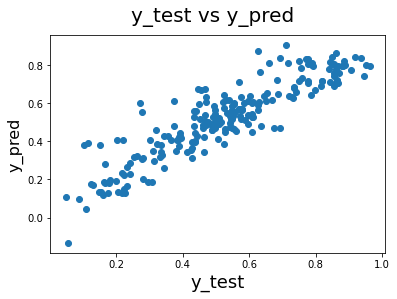

In [215]:
# Let's now plot the graph for actual versus predicted values.

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

round(lr_5.params,4)

In [ ]:
## Comparision between Training and Testing dataset:
## - Train dataset R^2          : 0.836
## - Test dataset R^2           : 0.8058

## Demand of bikes depend on year, workingday, temp, windspeed, july, sep, sat, Light_snowrain, Misty, spring, summer and winter.